# Index

### 1. Importing the Libraries
### 2. Data Preparation/Extraction
### 3. Data Processing/Cleaning







### 4. EDA

#### 4.1 Overall Data Statistics
#### 4.2 Data Distribution
#### 4.3 Skewness
#### 4.4 Q-Q Plot
#### 4.5 Balance Outlier Detection  
#### 4.6 Customers with more purchase than balance 
#### 4.7 Customer with less purchase than balance 
#### 4.8 Balance Vs Balance Frequency  
#### 4.9 Purchase Outliers 
#### 4.10 Purchase Types 
#### 4.11 Customer Opting Both ONEOFF and INSTALLMENTS 
#### 4.12 Purchase Frequency
#### 4.13 Balance Vs Purchase Type 
#### 4.14 Purchase Transactions
#### 4.15 Cash Advance 
#### 4.16 Customer Advance Cash Ratio 
#### 4.17 Customer who high advanced cash compared to their balance 
#### 4.18 Customers with no advance cash 
#### 4.19 Relation Between Balance and Credit Limit 
#### 4.20 Customers with very limit usage  
#### 4.21 Spending vs Limit 
#### 4.22 Customer spending more than their limit 
#### 4.23 Customers with High Credit Limit
#### 4.24 Customers with Low Credit Limit
#### 4.25 Payments







### 5. Clustering And Analysis of Each Cluster
#### 5.1 Optimal numbers of Cluster 
#### 5.2 Balance  
#### 5.3 Purchases
#### 5.4 Purchases Type  
#### 5.5 Advance Cash  
#### 5.6 Credit Limit   
#### 5.7 Purchase Credit Ratio

# Importing the Libraries

In [28]:
import pandas as pd
from scipy.stats import skew 
import numpy as np  
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Preparation/Extraction/Cleaning

In [29]:
df=pd.read_csv('Task1_Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,nan,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12


In [30]:
df.shape

(8950, 18)

In [31]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
df['MINIMUM_PAYMENTS'].fillna(0,inplace=True)
df['CREDIT_LIMIT'].fillna(0,inplace=True)

In [33]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# EDA

### Overall Data Statistics 

In [34]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000,8950.000
mean,1564.475,0.877,1003.205,592.437,411.068,978.871,0.490,0.202,0.364,0.135,3.249,14.710,4493.947,1733.144,833.983,0.154,11.517
std,2081.532,0.237,2136.635,1659.888,904.338,2097.164,0.401,0.298,0.397,0.200,6.825,24.858,3638.923,2895.064,2335.990,0.292,1.338
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
25%,128.282,0.889,39.635,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,1600.000,383.276,163.028,0.000,12.000
50%,873.385,1.000,361.280,38.000,89.000,0.000,0.500,0.083,0.167,0.000,0.000,7.000,3000.000,856.902,289.628,0.000,12.000
75%,2054.140,1.000,1110.130,577.405,468.637,1113.821,0.917,0.300,0.750,0.222,4.000,17.000,6500.000,1901.134,788.714,0.143,12.000
max,19043.139,1.000,49039.570,40761.250,22500.000,47137.212,1.000,1.000,1.000,1.500,123.000,358.000,30000.000,50721.483,76406.208,1.000,12.000


In [35]:
data=pd.DataFrame(columns=['Column Name','Normal Mean','Trimmed Mean','Normal Median','Outliers or Extreme Values Effect'])
for col in list(df.columns)[1:]:
    val1=float(df[col].mean())
    val2=float(stats.trim_mean(df[col], 0.1))
    val3=float(df[col].median())
    val4=(abs(val2-val1)/val1)*100
    data.loc[len(data)]=[col,val1,val2,val3,val4]

data

,Column Name,Normal Mean,Trimmed Mean,Normal Median,Outliers or Extreme Values Effect
0,BALANCE,1564.475,1128.165,873.385,27.889
1,BALANCE_FREQUENCY,0.877,0.938,1.000,6.935
2,PURCHASES,1003.205,583.100,361.280,41.876
3,ONEOFF_PURCHASES,592.437,263.816,38.000,55.469
4,INSTALLMENTS_PURCHASES,411.068,223.032,89.000,45.743
5,CASH_ADVANCE,978.871,494.902,0.000,49.442
6,PURCHASES_FREQUENCY,0.490,0.488,0.500,0.492
7,ONEOFF_PURCHASES_FREQUENCY,0.202,0.137,0.083,32.225
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.364,0.331,0.167,9.299
9,CASH_ADVANCE_FREQUENCY,0.135,0.092,0.000,31.584


### Data Distribution

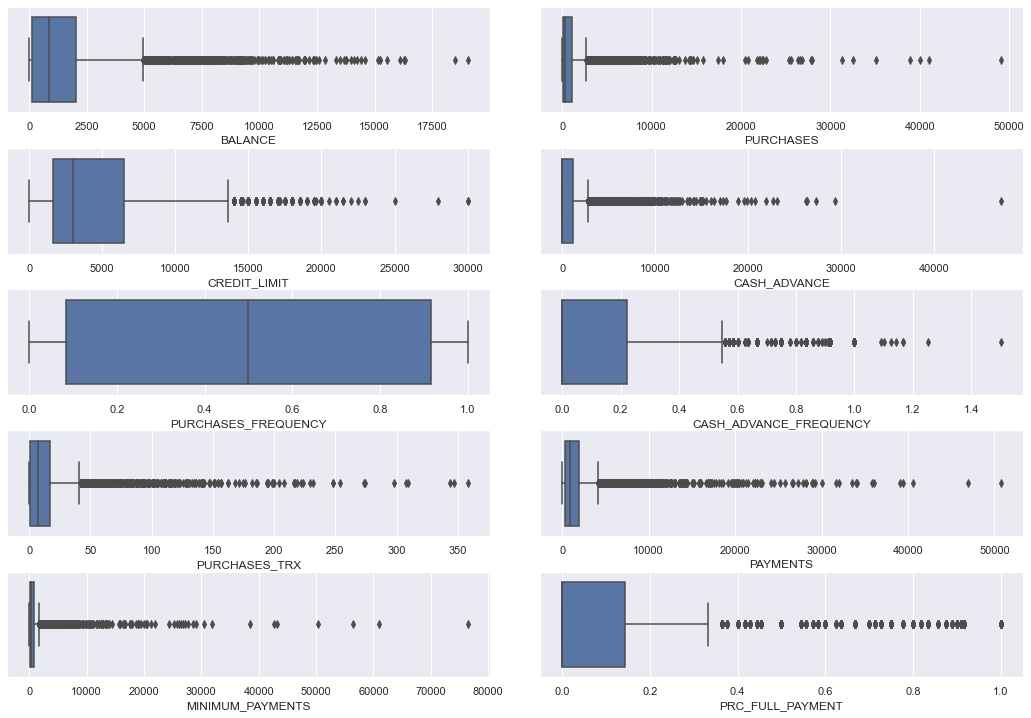

In [36]:
fig, ax = plt.subplots(5, 2)
# Setting height and width of subplots
fig.set_figheight(10)
fig.set_figwidth(15)
# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)
sns.boxplot(df["BALANCE"], ax=ax[0, 0])
sns.boxplot(df["PURCHASES"], ax=ax[0, 1])
sns.boxplot(df["CREDIT_LIMIT"], ax=ax[1, 0])
sns.boxplot(df["CASH_ADVANCE"], ax=ax[1, 1])
sns.boxplot(df["PURCHASES_FREQUENCY"], ax=ax[2, 0])
sns.boxplot(df["CASH_ADVANCE_FREQUENCY"], ax=ax[2, 1])
sns.boxplot(df["PURCHASES_TRX"], ax=ax[3, 0])
sns.boxplot(df["PAYMENTS"], ax=ax[3, 1])
sns.boxplot(df["MINIMUM_PAYMENTS"], ax=ax[4, 0])
sns.boxplot(df["PRC_FULL_PAYMENT"], ax=ax[4, 1])
plt.show()

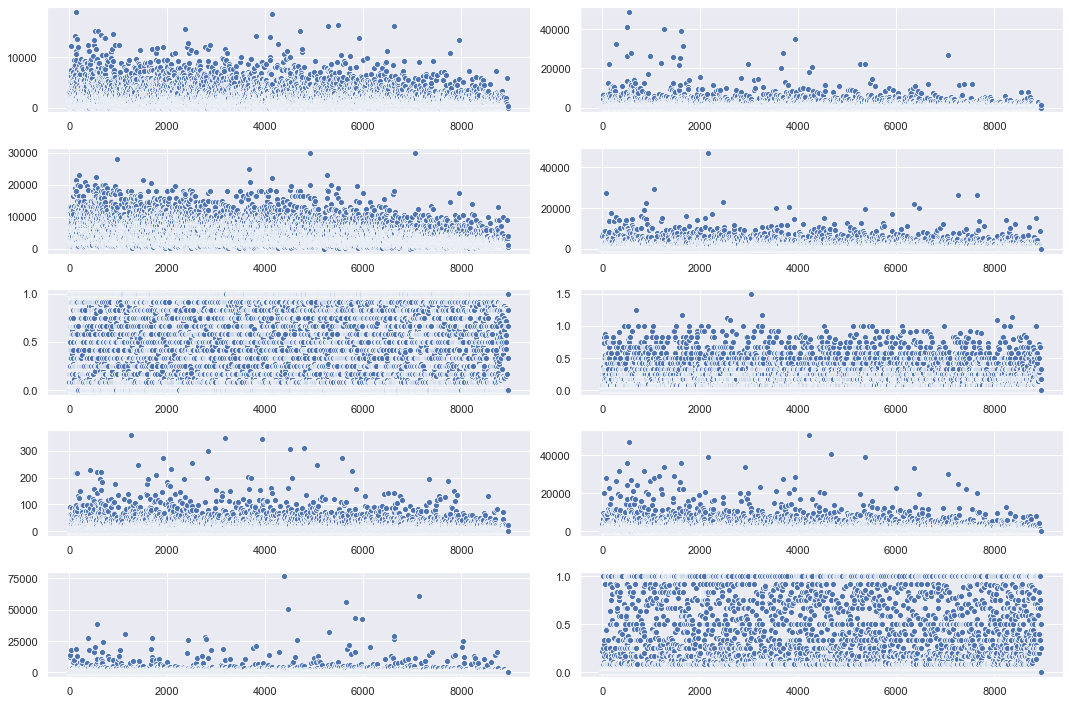

In [37]:
fig, ax = plt.subplots(5, 2)
# Setting height and width of subplots
fig.set_figheight(10)
fig.set_figwidth(15)
# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)
sns.scatterplot(data=df["BALANCE"], ax=ax[0, 0])
sns.scatterplot(data=df["PURCHASES"], ax=ax[0, 1])
sns.scatterplot(data=df["CREDIT_LIMIT"], ax=ax[1, 0])
sns.scatterplot(data=df["CASH_ADVANCE"], ax=ax[1, 1])
sns.scatterplot(data=df["PURCHASES_FREQUENCY"], ax=ax[2, 0])
sns.scatterplot(data=df["CASH_ADVANCE_FREQUENCY"], ax=ax[2, 1])
sns.scatterplot(data=df["PURCHASES_TRX"], ax=ax[3, 0])
sns.scatterplot(data=df["PAYMENTS"], ax=ax[3, 1])
sns.scatterplot(data=df["MINIMUM_PAYMENTS"], ax=ax[4, 0])
sns.scatterplot(data=df["PRC_FULL_PAYMENT"], ax=ax[4, 1])
plt.show()

### Skewness

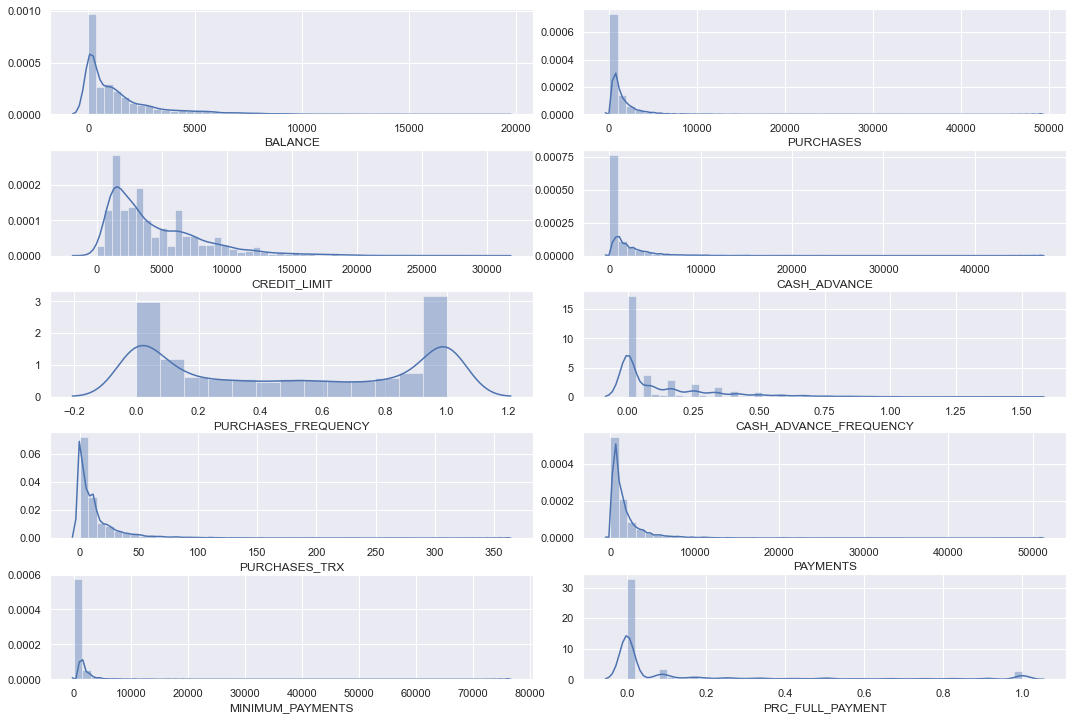

In [38]:
fig, ax = plt.subplots(5, 2)
# Setting height and width of subplots
fig.set_figheight(10)
fig.set_figwidth(15)
# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)
sns.distplot(df["BALANCE"], ax=ax[0, 0])
sns.distplot(df["PURCHASES"], ax=ax[0, 1])
sns.distplot(df["CREDIT_LIMIT"], ax=ax[1, 0])
sns.distplot(df["CASH_ADVANCE"], ax=ax[1, 1])
sns.distplot(df["PURCHASES_FREQUENCY"], ax=ax[2, 0])
sns.distplot(df["CASH_ADVANCE_FREQUENCY"], ax=ax[2, 1])
sns.distplot(df["PURCHASES_TRX"], ax=ax[3, 0])
sns.distplot(df["PAYMENTS"], ax=ax[3, 1])
sns.distplot(df["MINIMUM_PAYMENTS"], ax=ax[4, 0])
sns.distplot(df["PRC_FULL_PAYMENT"], ax=ax[4, 1])
plt.show()

### Correlation

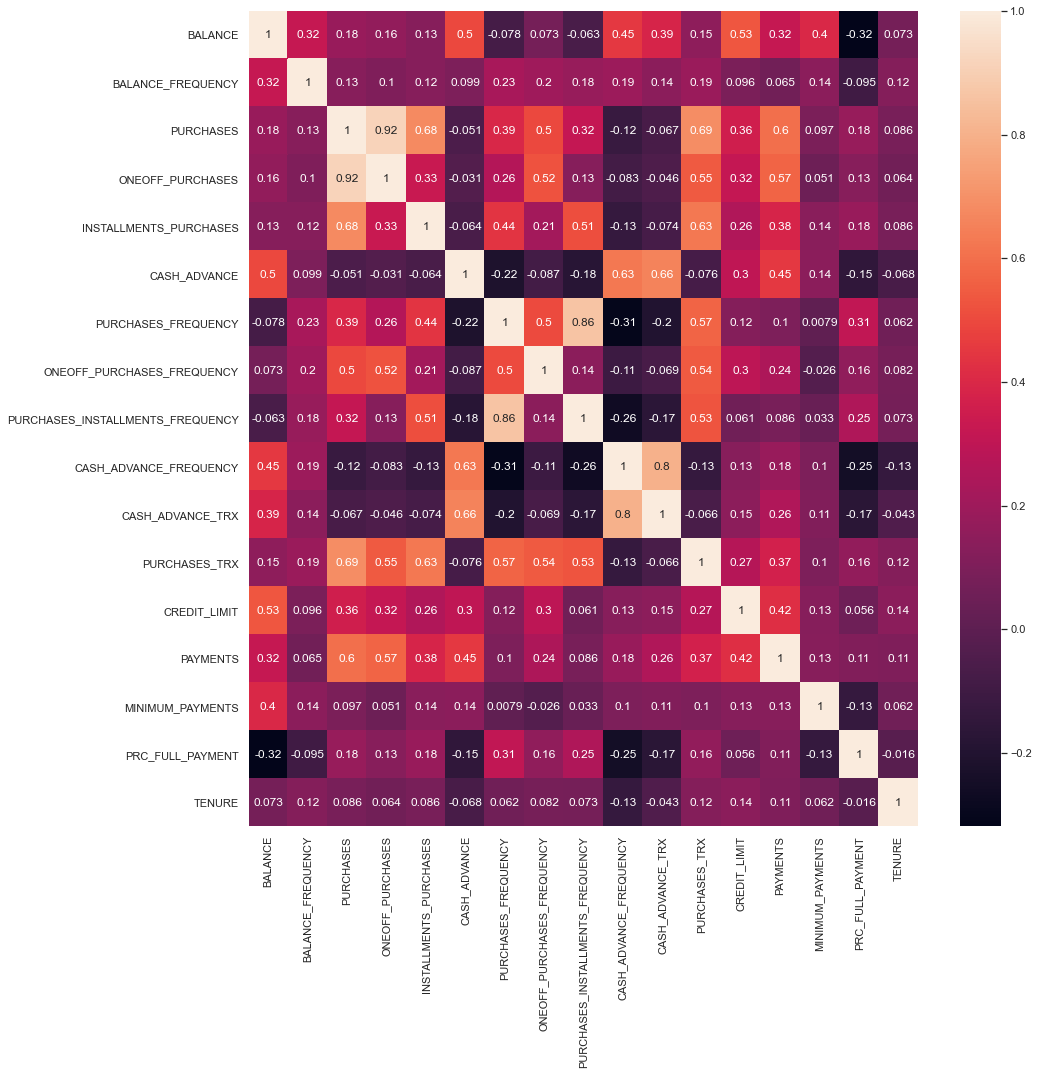

In [39]:
# Looking at mulitcollinearity
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

### Q-Q Plot

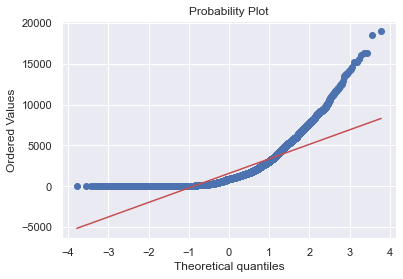

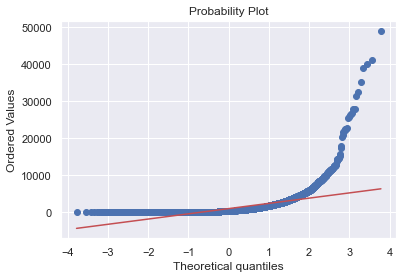

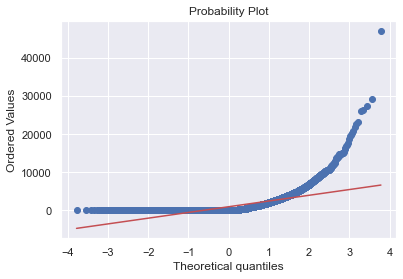

In [40]:
cols=['BALANCE','PURCHASES','CASH_ADVANCE']
for col in cols:
    scipy.stats.probplot(df[col],plot=pylab)
    pylab.show()

### Balance Outlier Detection 

Rejection: 13 points
z_score of 3 corresponds to prob of 0.00%


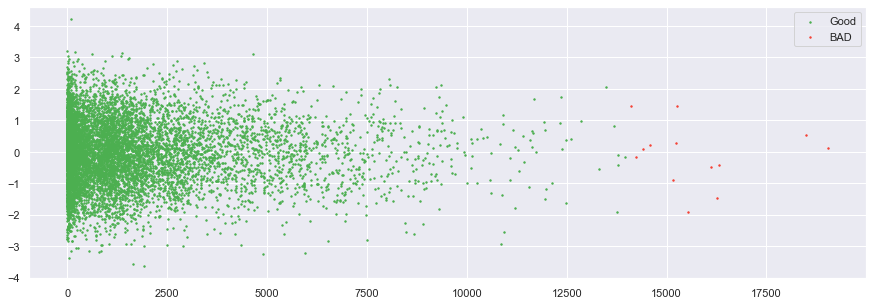

In [41]:
mean,std=np.mean(df['BALANCE']),np.std(df['BALANCE'])
z_score=np.abs((df['BALANCE']-mean)/std)
threshold=6
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['BALANCE'].size)

plt.figure(figsize=(15,5))
plt.scatter(df['BALANCE'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['BALANCE'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

### Customers with more purchase than balance

In [42]:
data=df[df.apply(lambda x:x['BALANCE']-x['PURCHASES']<0,axis=1)]
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
6,C10007,627.261,1.000,7091.010,6402.630,688.380,0.000,1.000,1.000,1.000,0.000,0,64,13500.000,6354.314,198.066,1.000,12
9,C10010,152.226,0.545,1281.600,1281.600,0.000,0.000,0.167,0.167,0.000,0.000,0,3,11000.000,1164.771,100.302,0.000,12
11,C10012,630.795,0.818,1492.180,1492.180,0.000,0.000,0.250,0.250,0.000,0.000,0,6,2000.000,705.619,155.549,0.000,12
12,C10013,1516.929,1.000,3217.990,2500.230,717.760,0.000,1.000,0.250,0.917,0.000,0,26,3000.000,608.264,490.207,0.250,12


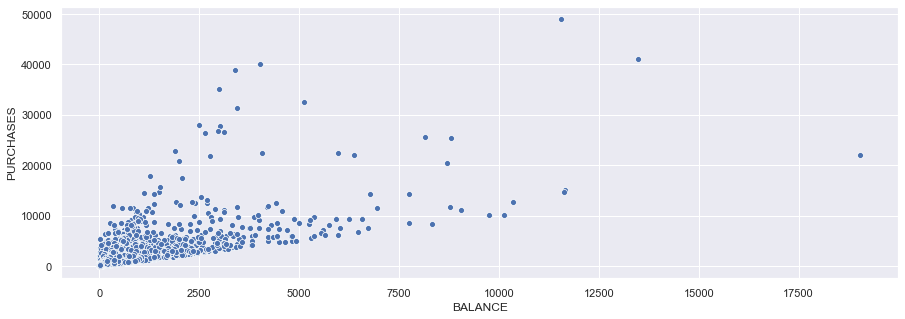

In [43]:
plt.figure(figsize=(15,5))
sns.scatterplot(data['BALANCE'],data['PURCHASES'])

### Customer with less purchase than balance

In [44]:
data=df[df.apply(lambda x:x['BALANCE']-x['PURCHASES']>0,axis=1)]
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,0.000,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12
5,C10006,1809.829,1.000,1333.280,0.000,1333.280,0.000,0.667,0.000,0.583,0.000,0,8,1800.000,1400.058,2407.246,0.000,12


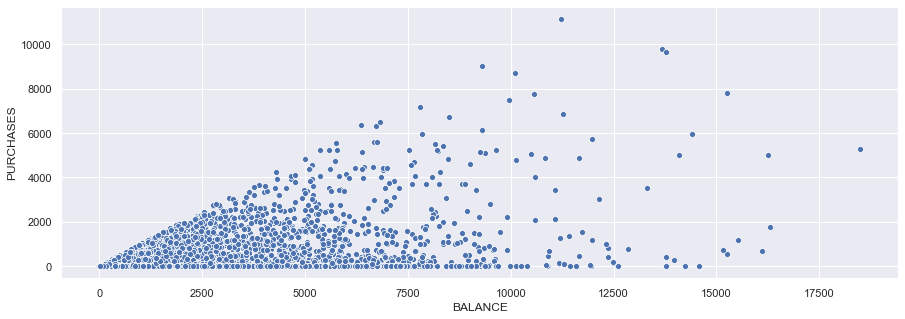

In [45]:
plt.figure(figsize=(15,5))
sns.scatterplot(data['BALANCE'],data['PURCHASES'])

### Balance Vs Balance Frequency 

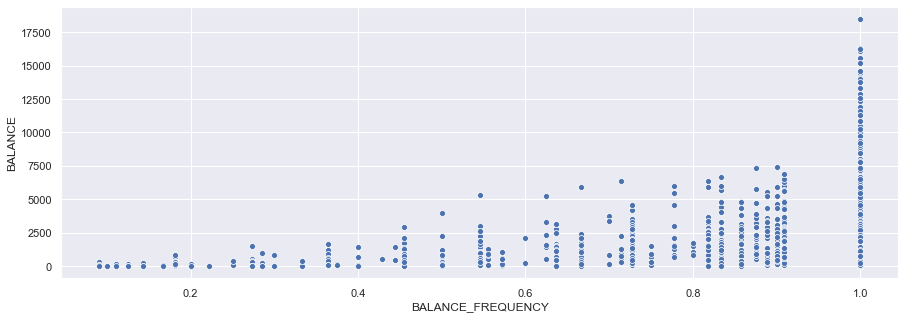

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(data['BALANCE_FREQUENCY'],data['BALANCE'])

### Purchase Outliers

Rejection: 32 points
z_score of 3 corresponds to prob of 0.00%


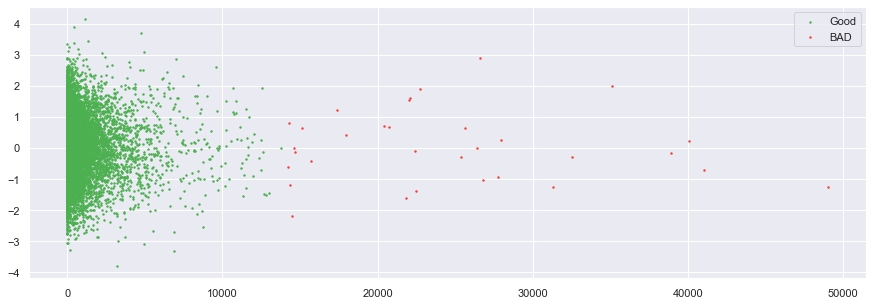

In [47]:
mean,std=np.mean(df['PURCHASES']),np.std(df['PURCHASES'])
z_score=np.abs((df['PURCHASES']-mean)/std)
threshold=6
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['PURCHASES'].size)

plt.figure(figsize=(15,5))
plt.scatter(df['PURCHASES'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['PURCHASES'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

### Purchase Types

In [48]:
def f(x):
    if((x['ONEOFF_PURCHASES']!=0) & (x['INSTALLMENTS_PURCHASES']!=0)):
        val='Both'
    elif(x['ONEOFF_PURCHASES']!=0):
        val='ONE OFF'
    elif(x['INSTALLMENTS_PURCHASES']!=0):
        val = 'INSTALLMENTS'
    else:
        val='NO PURCHASE'
    return val

df['PURCHASE_TYPE'] = df.apply(f,axis=1)

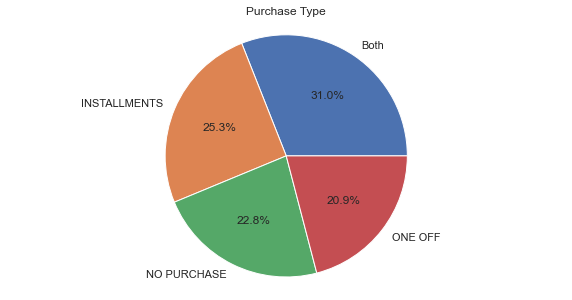

In [49]:
vals=list(df['PURCHASE_TYPE'].value_counts().values)
labels=list(df['PURCHASE_TYPE'].value_counts().index)
plt.figure(figsize=(10,5))
plt.pie(vals,labels=labels,autopct='%1.1f%%')
plt.title('Purchase Type')
plt.axis('equal')
plt.show()

In [50]:
print("Average Amount Payment Through ONEOFF: ",df['ONEOFF_PURCHASES'].mean())
print("Average Amount Payment Through INSTALLMENTS: ",df['INSTALLMENTS_PURCHASES'].mean())

Average Amount Payment Through ONEOFF:  592.437370949722
Average Amount Payment Through INSTALLMENTS:  411.06764469273713


### Customer Opting Both ONEOFF and INSTALLMENTS

In [51]:
data=df[df['PURCHASE_TYPE']=='Both']
data['ONEOFF_PURCHASES_Ratio']=data['ONEOFF_PURCHASES']/data['PURCHASES']
data['INSTALLMENTS_PURCHASES_Ratio']=data['INSTALLMENTS_PURCHASES']/data['PURCHASES']

<ipython-input-51-89324664e7db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ONEOFF_PURCHASES_Ratio']=data['ONEOFF_PURCHASES']/data['PURCHASES']
<ipython-input-51-89324664e7db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INSTALLMENTS_PURCHASES_Ratio']=data['INSTALLMENTS_PURCHASES']/data['PURCHASES']


In [52]:
print("Average % Payment Through ONEOFF: ",round(data['ONEOFF_PURCHASES_Ratio'].mean()*100,1),'%')
print("Average % Payment Through INSTALLMENTS: ",round(data['INSTALLMENTS_PURCHASES_Ratio'].mean()*100,1),'%')

Average % Payment Through ONEOFF:  54.9 %
Average % Payment Through INSTALLMENTS:  45.1 %


### Purchase Frequency

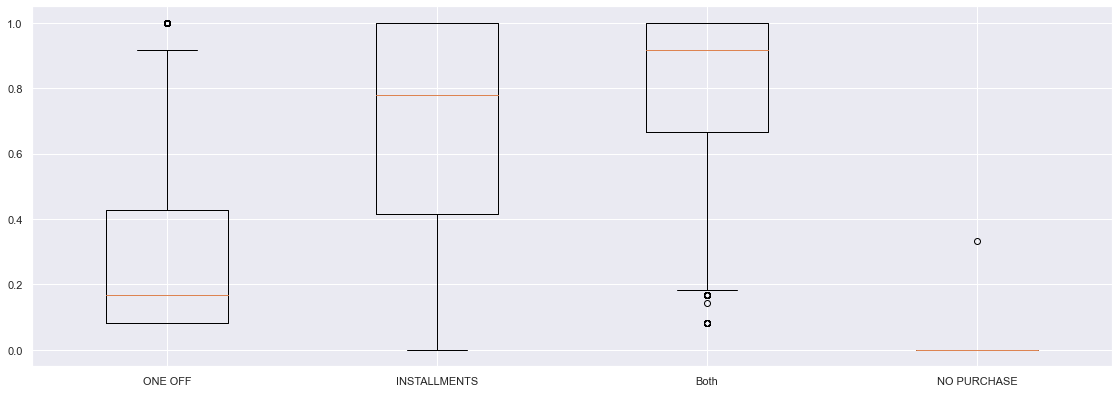

In [53]:
data = [df[df['PURCHASE_TYPE']=='ONE OFF']["PURCHASES_FREQUENCY"],
        df[df['PURCHASE_TYPE']=='INSTALLMENTS']["PURCHASES_FREQUENCY"],
        df[df['PURCHASE_TYPE']=='Both']["PURCHASES_FREQUENCY"],
        df[df['PURCHASE_TYPE']=='NO PURCHASE']["PURCHASES_FREQUENCY"]] 

fig = plt.figure(figsize =(15, 5))
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['ONE OFF', 'INSTALLMENTS',  
                    'Both', 'NO PURCHASE'])
bp = ax.boxplot(data)

plt.show() 

In [54]:
data=pd.DataFrame(df.groupby('PURCHASE_TYPE')['PURCHASES_FREQUENCY'].mean()).reset_index()
data.columns=['PURCHASE_TYPE','Average PURCHASES FREQUENCY']
data

,PURCHASE_TYPE,Average PURCHASES FREQUENCY
0,Both,0.799
1,INSTALLMENTS,0.695
2,NO PURCHASE,0.000
3,ONE OFF,0.321


### Balance Vs Purchase Type

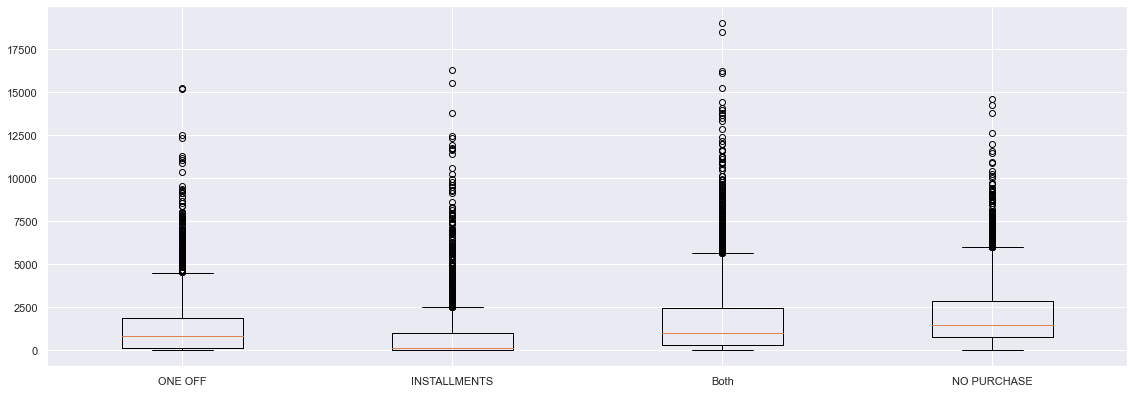

In [55]:
data = [df[df['PURCHASE_TYPE']=='ONE OFF']["BALANCE"],
        df[df['PURCHASE_TYPE']=='INSTALLMENTS']["BALANCE"],
        df[df['PURCHASE_TYPE']=='Both']["BALANCE"],
        df[df['PURCHASE_TYPE']=='NO PURCHASE']["BALANCE"]] 

fig = plt.figure(figsize =(15, 5))
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['ONE OFF', 'INSTALLMENTS',  
                    'Both', 'NO PURCHASE'])
bp = ax.boxplot(data)

plt.show() 

In [56]:
data=pd.DataFrame(df.groupby('PURCHASE_TYPE')['BALANCE'].mean()).reset_index()
data.columns=['PURCHASE_TYPE','Average Balance']
data

,PURCHASE_TYPE,Average Balance
0,Both,1805.968
1,INSTALLMENTS,845.278
2,NO PURCHASE,2147.760
3,ONE OFF,1438.762


### Purchase Transactions

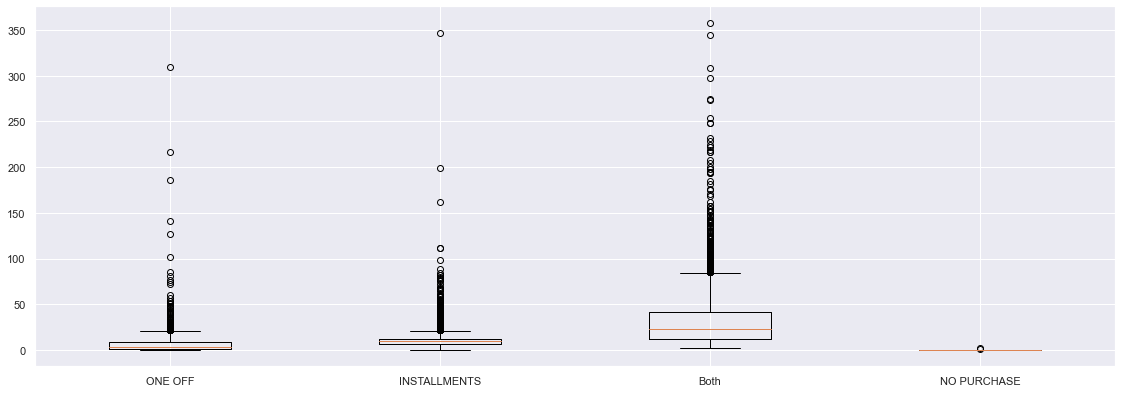

In [57]:
data = [df[df['PURCHASE_TYPE']=='ONE OFF']["PURCHASES_TRX"],
        df[df['PURCHASE_TYPE']=='INSTALLMENTS']["PURCHASES_TRX"],
        df[df['PURCHASE_TYPE']=='Both']["PURCHASES_TRX"],
        df[df['PURCHASE_TYPE']=='NO PURCHASE']["PURCHASES_TRX"]] 

fig = plt.figure(figsize =(15, 5))
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['ONE OFF', 'INSTALLMENTS',  
                    'Both', 'NO PURCHASE'])
bp = ax.boxplot(data)

plt.show() 

In [58]:
data=pd.DataFrame(df.groupby('PURCHASE_TYPE')['PURCHASES_TRX'].mean()).reset_index()
data.columns=['PURCHASE_TYPE','Average Purchase Transactions']
data

,PURCHASE_TYPE,Average Purchase Transactions
0,Both,32.960
1,INSTALLMENTS,11.901
2,NO PURCHASE,0.001
3,ONE OFF,7.110


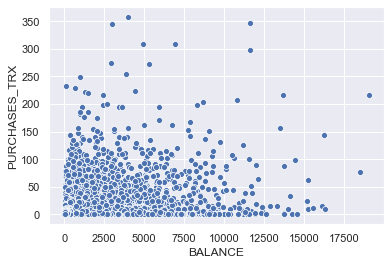

In [59]:
sns.scatterplot(df['BALANCE'],df['PURCHASES_TRX'])

### Cash Advance

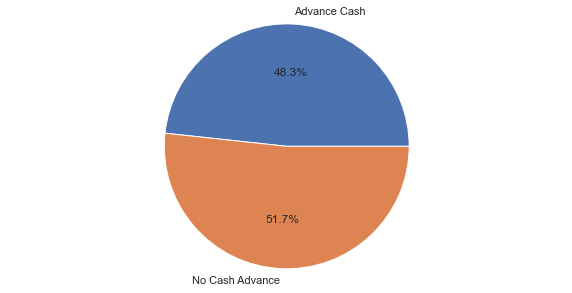

In [60]:
vals=[df[df['CASH_ADVANCE']!=0].shape[0],df[df['CASH_ADVANCE']==0].shape[0]]
labels=['Advance Cash','No Cash Advance']
plt.figure(figsize=(10,5))
plt.pie(vals,labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Customer Advance Cash Ratio

In [61]:
df['CASH_ADVANCE_RATIO']=0
for i in range(len(df)):
    if(df['BALANCE'][i]>100):
        df['CASH_ADVANCE_RATIO'][i]=df['CASH_ADVANCE'][i]/df['BALANCE'][i]
df['CASH_ADVANCE_RATIO'].head()

<ipython-input-61-04174b4c14d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASH_ADVANCE_RATIO'][i]=df['CASH_ADVANCE'][i]/df['BALANCE'][i]


0    0
1    2
2    0
3    0
4    0
Name: CASH_ADVANCE_RATIO, dtype: int64

### Customer who high advanced cash compared to their balance

In [62]:
data1=df[df['CASH_ADVANCE_RATIO']>1]
data1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,CASH_ADVANCE_RATIO
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12,NO PURCHASE,2
23,C10024,3800.151,0.818,4248.350,3454.560,793.790,7974.416,1.000,0.083,0.917,0.333,13,13,9000.000,9479.044,1425.427,0.000,12,Both,2
39,C10040,1411.602,0.455,963.240,963.240,0.000,6173.683,0.083,0.083,0.000,0.333,6,6,7500.000,20071.075,719.949,0.333,12,ONE OFF,4
40,C10041,663.448,0.727,0.000,0.000,0.000,3133.064,0.000,0.000,0.000,0.250,3,0,1800.000,3067.058,283.333,0.167,12,NO PURCHASE,4
41,C10043,784.890,0.909,1526.590,786.300,740.290,2188.420,0.583,0.417,0.333,0.250,11,27,3000.000,1262.310,363.143,0.111,12,Both,2


In [63]:
print("Average Balance: ",data1['BALANCE'].mean())
print("Average Purchases: ",data1['PURCHASES'].mean())
print("Average Purchases Transaction: ",data1['PURCHASES_TRX'].mean())
print("Average Purchases Frequency: ",data1['PURCHASES_FREQUENCY'].mean())
print("Average Cash Advance Frequency: ",data1['CASH_ADVANCE_FREQUENCY'].mean())

Average Balance:  1164.7380869292654
Average Purchases:  498.49069348127614
Average Purchases Transaction:  6.327323162274618
Average Purchases Frequency:  0.21883530235783644
Average Cash Advance Frequency:  0.3341981636615811


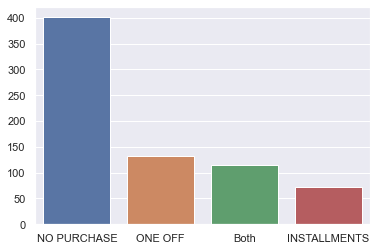

In [64]:
x=data1['PURCHASE_TYPE'].value_counts()
sns.barplot(list(x.index),list(x.values))

### Customers with no advance cash

In [65]:
data2=df[df['CASH_ADVANCE_RATIO']==0]
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,CASH_ADVANCE_RATIO
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12,INSTALLMENTS,0
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12,ONE OFF,0
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,0.000,0.000,12,ONE OFF,0
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12,ONE OFF,0
5,C10006,1809.829,1.000,1333.280,0.000,1333.280,0.000,0.667,0.000,0.583,0.000,0,8,1800.000,1400.058,2407.246,0.000,12,INSTALLMENTS,0


In [66]:
print("Average Balance: ",data2['BALANCE'].mean())
print("Average Purchases: ",data2['PURCHASES'].mean())
print("Average Purchases Transaction: ",data2['PURCHASES_TRX'].mean())
print("Average Purchases Frequency: ",data2['PURCHASES_FREQUENCY'].mean())

Average Balance:  1525.360742187894
Average Purchases:  1120.3796137398272
Average Purchases Transaction:  16.498827424472342
Average Purchases Frequency:  0.5432665735963589


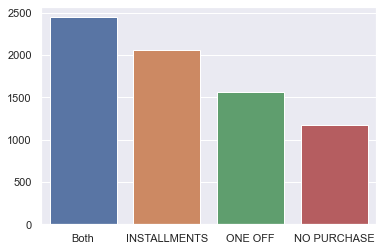

In [67]:
x=data2['PURCHASE_TYPE'].value_counts()
sns.barplot(list(x.index),list(x.values))

In [68]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PURCHASE_TYPE',
       'CASH_ADVANCE_RATIO'],
      dtype='object')

### Credit 

### Relation Between Balance and Credit Limit

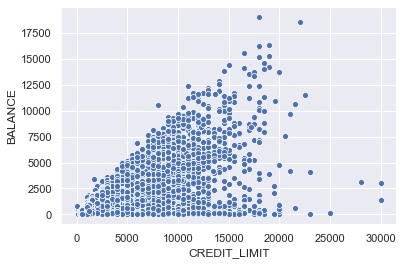

In [69]:
sns.scatterplot(df['CREDIT_LIMIT'],df['BALANCE'])

In [70]:
df[['CREDIT_LIMIT','BALANCE','PURCHASES','PURCHASES_TRX','PURCHASES_FREQUENCY','CASH_ADVANCE']].corr()

,CREDIT_LIMIT,BALANCE,PURCHASES,PURCHASES_TRX,PURCHASES_FREQUENCY,CASH_ADVANCE
CREDIT_LIMIT,1.000,0.531,0.357,0.273,0.120,0.304
BALANCE,0.531,1.000,0.181,0.154,-0.078,0.497
PURCHASES,0.357,0.181,1.000,0.690,0.393,-0.051
PURCHASES_TRX,0.273,0.154,0.690,1.000,0.568,-0.076
PURCHASES_FREQUENCY,0.120,-0.078,0.393,0.568,1.000,-0.216
CASH_ADVANCE,0.304,0.497,-0.051,-0.076,-0.216,1.000


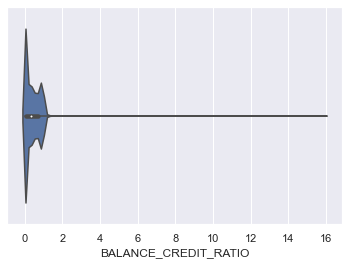

In [71]:
df['BALANCE_CREDIT_RATIO']=df['BALANCE']/df['CREDIT_LIMIT']
sns.violinplot(df[np.isfinite(df['BALANCE_CREDIT_RATIO'])]['BALANCE_CREDIT_RATIO'])

### Customers with very limit usage 

In [72]:
data=df[df['BALANCE_CREDIT_RATIO']>1]
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,CASH_ADVANCE_RATIO,BALANCE_CREDIT_RATIO
5,C10006,1809.829,1.000,1333.280,0.000,1333.280,0.000,0.667,0.000,0.583,...,0,8,1800.000,1400.058,2407.246,0.000,12,INSTALLMENTS,0,1.005
10,C10011,1293.125,1.000,920.120,0.000,920.120,0.000,1.000,0.000,1.000,...,0,12,1200.000,1083.301,2172.698,0.000,12,INSTALLMENTS,0,1.078
20,C10021,2016.685,1.000,176.680,0.000,176.680,0.000,0.667,0.000,0.667,...,0,8,2000.000,223.069,13557.297,0.000,12,INSTALLMENTS,0,1.008
64,C10067,1923.887,1.000,1887.640,0.000,1887.640,1605.949,1.000,0.000,1.000,...,4,61,1850.000,3688.046,3266.997,0.083,12,INSTALLMENTS,0,1.040
78,C10082,1205.717,1.000,0.000,0.000,0.000,38.326,0.000,0.000,0.000,...,1,0,1200.000,29.279,8242.688,0.000,12,NO PURCHASE,0,1.005


In [73]:
data['PURCHASE_TYPE'].value_counts()

INSTALLMENTS    124
Both             58
NO PURCHASE      23
ONE OFF          23
Name: PURCHASE_TYPE, dtype: int64

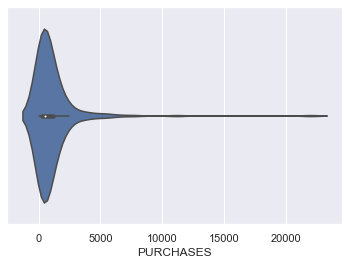

In [74]:
sns.violinplot(data['PURCHASES'])

### Spending vs Limit

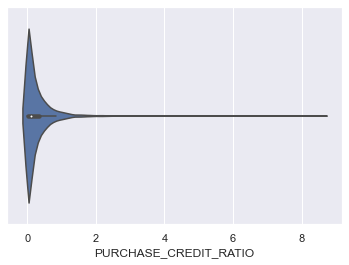

In [75]:
df['PURCHASE_CREDIT_RATIO']=df['PURCHASES']/df['CREDIT_LIMIT']
sns.violinplot(df[np.isfinite(df['PURCHASE_CREDIT_RATIO'])]['PURCHASE_CREDIT_RATIO'])

### Customer spending more than their limit 

In [76]:
data=df[df['PURCHASE_CREDIT_RATIO']>1]
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,CASH_ADVANCE_RATIO,BALANCE_CREDIT_RATIO,PURCHASE_CREDIT_RATIO
12,C10013,1516.929,1.000,3217.990,2500.230,717.760,0.000,1.000,0.250,0.917,...,26,3000.000,608.264,490.207,0.250,12,Both,0,0.506,1.073
51,C10053,1078.889,1.000,3107.850,2221.740,886.110,0.000,0.667,0.583,0.500,...,18,2500.000,1399.828,1322.447,0.000,12,Both,0,0.432,1.243
64,C10067,1923.887,1.000,1887.640,0.000,1887.640,1605.949,1.000,0.000,1.000,...,61,1850.000,3688.046,3266.997,0.083,12,INSTALLMENTS,0,1.040,1.020
125,C10131,2392.918,1.000,12462.440,12462.440,0.000,0.000,0.917,0.917,0.000,...,217,2800.000,11628.716,2000.991,0.000,12,ONE OFF,0,0.855,4.451
138,C10144,19043.139,1.000,22009.920,9449.070,12560.850,0.000,1.000,0.750,1.000,...,216,18000.000,23018.576,18621.013,0.000,12,Both,0,1.058,1.223


In [77]:
data['PURCHASE_TYPE'].value_counts()

Both            309
INSTALLMENTS     66
ONE OFF          66
Name: PURCHASE_TYPE, dtype: int64

### Customers with High Credit Limit

In [78]:
data1=df[df['CREDIT_LIMIT']>=df['CREDIT_LIMIT'].mean()]
data1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,CASH_ADVANCE_RATIO,BALANCE_CREDIT_RATIO,PURCHASE_CREDIT_RATIO
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,...,0,7000.000,4103.033,1072.340,0.222,12,NO PURCHASE,2,0.457,0.000
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,...,12,7500.000,622.067,627.285,0.000,12,ONE OFF,0,0.333,0.103
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,...,1,7500.000,0.000,0.000,0.000,12,ONE OFF,0,0.222,0.200
6,C10007,627.261,1.000,7091.010,6402.630,688.380,0.000,1.000,1.000,1.000,...,64,13500.000,6354.314,198.066,1.000,12,Both,0,0.046,0.525
8,C10009,1014.926,1.000,861.490,661.490,200.000,0.000,0.333,0.083,0.250,...,5,7000.000,688.279,311.963,0.000,12,Both,0,0.145,0.123


In [79]:
print("Average Balance: ",data1['BALANCE'].mean())
print("Average Purchases: ",data1['PURCHASES'].mean())
print("Average Purchases Transaction: ",data1['PURCHASES_TRX'].mean())
print("Average Purchases Frequency: ",data1['PURCHASES_FREQUENCY'].mean())
print("Average Tenure: ",int(data1['TENURE'].mean()))
print("Average % Full Payment Month: ",data1['PRC_FULL_PAYMENT'].mean())

Average Balance:  2667.2907398833754
Average Purchases:  1670.57205633803
Average Purchases Transaction:  21.712394366197184
Average Purchases Frequency:  0.5463446853521137
Average Tenure:  11
Average % Full Payment Month:  0.1676607259154935


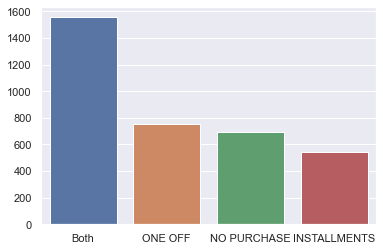

In [80]:
x=data1['PURCHASE_TYPE'].value_counts()
sns.barplot(list(x.index),list(x.values))

### Customers with Low Credit Limit

In [81]:
data2=df[df['CREDIT_LIMIT']<df['CREDIT_LIMIT'].mean()]
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,CASH_ADVANCE_RATIO,BALANCE_CREDIT_RATIO,PURCHASE_CREDIT_RATIO
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,...,2,1000.000,201.802,139.510,0.000,12,INSTALLMENTS,0,0.041,0.095
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,...,1,1200.000,678.335,244.791,0.000,12,ONE OFF,0,0.681,0.013
5,C10006,1809.829,1.000,1333.280,0.000,1333.280,0.000,0.667,0.000,0.583,...,8,1800.000,1400.058,2407.246,0.000,12,INSTALLMENTS,0,1.005,0.741
7,C10008,1823.653,1.000,436.200,0.000,436.200,0.000,1.000,0.000,1.000,...,12,2300.000,679.065,532.034,0.000,12,INSTALLMENTS,0,0.793,0.190
10,C10011,1293.125,1.000,920.120,0.000,920.120,0.000,1.000,0.000,1.000,...,12,1200.000,1083.301,2172.698,0.000,12,INSTALLMENTS,0,1.078,0.767


In [82]:
print("Average Balance: ",data2['BALANCE'].mean())
print("Average Purchases: ",data2['PURCHASES'].mean())
print("Average Purchases Transaction: ",data2['PURCHASES_TRX'].mean())
print("Average Purchases Frequency: ",data2['PURCHASES_FREQUENCY'].mean())
print("Average Tenure: ",int(data2['TENURE'].mean()))
print("Average % Full Payment Month: ",data2['PRC_FULL_PAYMENT'].mean())

Average Balance:  839.4754779875932
Average Purchases:  564.4726777777768
Average Purchases Transaction:  10.106296296296296
Average Purchases Frequency:  0.4535395879629641
Average Tenure:  11
Average % Full Payment Month:  0.1445463938888894


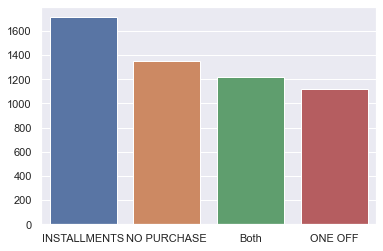

In [83]:
x=data2['PURCHASE_TYPE'].value_counts()
sns.barplot(list(x.index),list(x.values))

### Payments

In [84]:
df['PAYMENY_MIN_PAYMENT_RATIO']=0
for i in range(len(df)):
    if(df['MINIMUM_PAYMENTS'][i]!=0):
        df['PAYMENY_MIN_PAYMENT_RATIO'][i]=df['PAYMENTS'][i]/df['MINIMUM_PAYMENTS'][i]
        
df['PAYMENY_MIN_PAYMENT_RATIO'].head()

<ipython-input-84-9e1d30da7ef3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PAYMENY_MIN_PAYMENT_RATIO'][i]=df['PAYMENTS'][i]/df['MINIMUM_PAYMENTS'][i]


0    1
1    3
2    0
3    0
4    2
Name: PAYMENY_MIN_PAYMENT_RATIO, dtype: int64

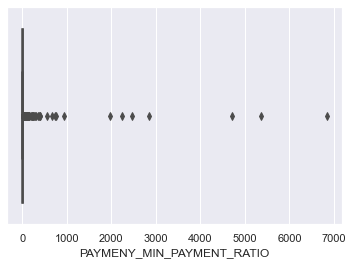

In [85]:
sns.boxplot(df['PAYMENY_MIN_PAYMENT_RATIO'])

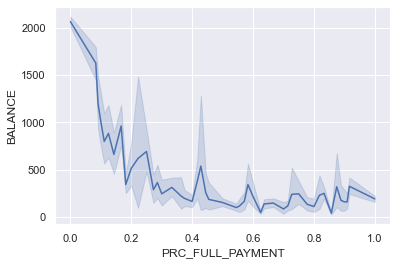

In [86]:
sns.lineplot(df['PRC_FULL_PAYMENT'],df['BALANCE'])

# Clustering

In [87]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [88]:
data=df.drop('CUST_ID',axis=1)
data.dropna(inplace=True)
data=data.reset_index().drop('index',axis=1)

for i in range(len(data)):
    if(data['PURCHASE_TYPE'][i]=='Both'):
        data['PURCHASE_TYPE'][i]=0
    elif(data['PURCHASE_TYPE'][i]=='NO PURCHASE'):
        data['PURCHASE_TYPE'][i]=1
    if(data['PURCHASE_TYPE'][i]=='ONE OFF'):
        data['PURCHASE_TYPE'][i]=2
    if(data['PURCHASE_TYPE'][i]=='INSTALLMENTS'):
        data['PURCHASE_TYPE'][i]=3

<ipython-input-88-189ecec41ea7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PURCHASE_TYPE'][i]=3
<ipython-input-88-189ecec41ea7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PURCHASE_TYPE'][i]=1
<ipython-input-88-189ecec41ea7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PURCHASE_TYPE'][i]=2
<ipython-input-88-189ecec41ea7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

### Optimal numbers of Cluster

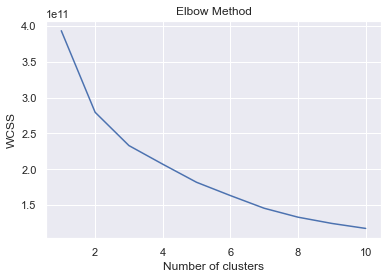

In [89]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
labels = kmeans.labels_
data['clusters'] = labels

In [91]:
data['clusters'].value_counts()

0    5721
2    2342
1     766
3     120
Name: clusters, dtype: int64

In [92]:
for i in range(len(data)):
    if(data['PURCHASE_TYPE'][i]==0):
        data['PURCHASE_TYPE'][i]='Both'
    elif(data['PURCHASE_TYPE'][i]==1):
        data['PURCHASE_TYPE'][i]='NO PURCHASE'
    if(data['PURCHASE_TYPE'][i]==2):
        data['PURCHASE_TYPE'][i]='ONE OFF'
    if(data['PURCHASE_TYPE'][i]==3):
        data['PURCHASE_TYPE'][i]='INSTALLMENTS'

<ipython-input-92-bdc1372d9fe1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PURCHASE_TYPE'][i]='INSTALLMENTS'
<ipython-input-92-bdc1372d9fe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PURCHASE_TYPE'][i]='NO PURCHASE'
<ipython-input-92-bdc1372d9fe1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PURCHASE_TYPE'][i]='ONE OFF'
<ipython-input-92-bdc1372d9fe1>:3: SettingWithCopyWarning: 
A value is trying to b

Text(32.333265277777784, 0.5, 'Credit Limit')

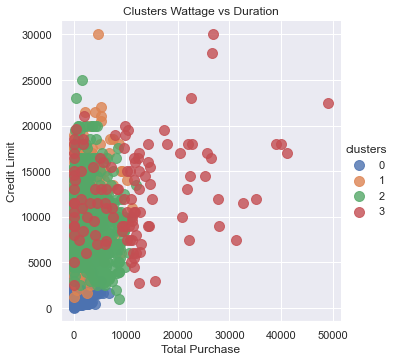

In [93]:
sns.lmplot('PURCHASES', 'CREDIT_LIMIT', 
           data=data, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Wattage vs Duration')
plt.xlabel('Total Purchase')
plt.ylabel('Credit Limit')

# Cluster Analysis

In [94]:
final=pd.DataFrame(columns=['Average Balance','Average Purchases','Most Used Purchase Type','Average Advance Cash',
                           'Average Purchase Transaction','Average Credit Limit','Average Payments','Average Tenure',
                            'Average Purchase Credit Ratio'])

for i in range(0,4):
    record=data[data['clusters']==i]
    
    val1=record['BALANCE'].mean()
    val2=record['PURCHASES'].mean()
    val3=list(record['PURCHASE_TYPE'].value_counts().index)[0]
    val4=record['CASH_ADVANCE'].mean()
    val5=record['PURCHASES_TRX'].mean()
    val6=record['CREDIT_LIMIT'].mean()
    val7=record['PAYMENTS'].mean()
    val8=record['TENURE'].mean()
    val9=record['PURCHASE_CREDIT_RATIO'].mean()
    
    final.loc[len(final)]=[val1,val2,val3,val4,val5,val6,val7,val8,val9]

In [95]:
final

,Average Balance,Average Purchases,Most Used Purchase Type,Average Advance Cash,Average Purchase Transaction,Average Credit Limit,Average Payments,Average Tenure,Average Purchase Credit Ratio
0,841.506,513.330,INSTALLMENTS,517.605,9.628,2314.043,920.044,11.386,0.273
1,6193.129,1099.748,NO PURCHASE,4625.742,17.127,9769.784,3949.482,11.624,0.118
2,1651.697,1640.224,Both,710.335,22.568,7675.058,2133.131,11.789,0.247
3,4796.388,11317.598,Both,4938.089,88.292,12696.250,18557.987,11.825,1.003


### Balance 

Text(0.5, 1.0, 'Group 4')

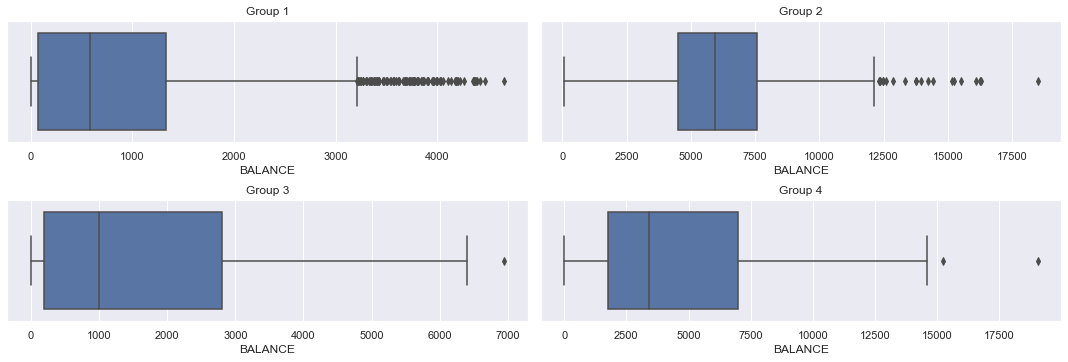

In [96]:
fig, ax = plt.subplots(2, 2)
# Setting height and width of subplots
fig.set_figheight(5)
fig.set_figwidth(15)
sns.boxplot(data[data['clusters']==0]["BALANCE"], ax=ax[0, 0])
sns.boxplot(data[data['clusters']==1]["BALANCE"], ax=ax[0, 1])
sns.boxplot(data[data['clusters']==2]["BALANCE"], ax=ax[1, 0])
sns.boxplot(data[data['clusters']==3]["BALANCE"], ax=ax[1, 1])
plt.tight_layout(h_pad=2.0)
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')

### Purchases 

Text(0.5, 1.0, 'Group 4')

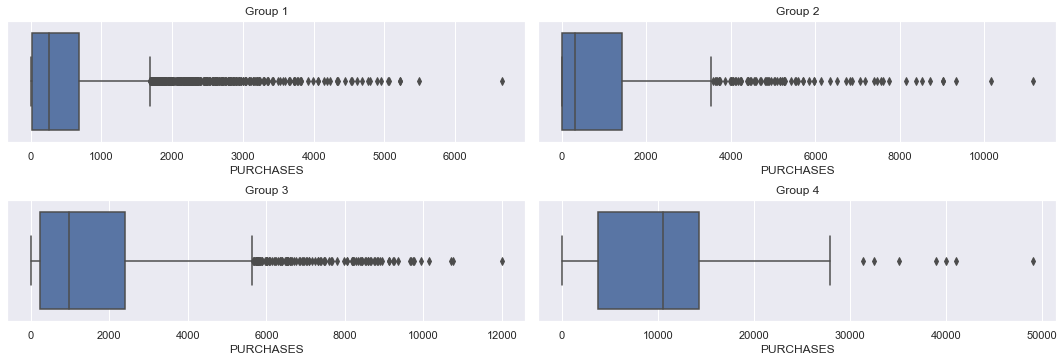

In [97]:
fig, ax = plt.subplots(2, 2)
# Setting height and width of subplots
fig.set_figheight(5)
fig.set_figwidth(15)
sns.boxplot(data[data['clusters']==0]["PURCHASES"], ax=ax[0, 0])
sns.boxplot(data[data['clusters']==1]["PURCHASES"], ax=ax[0, 1])
sns.boxplot(data[data['clusters']==2]["PURCHASES"], ax=ax[1, 0])
sns.boxplot(data[data['clusters']==3]["PURCHASES"], ax=ax[1, 1])
plt.tight_layout(h_pad=2.0)
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')

### Purchases Type 

Text(0.5, 1.0, 'Group 4')

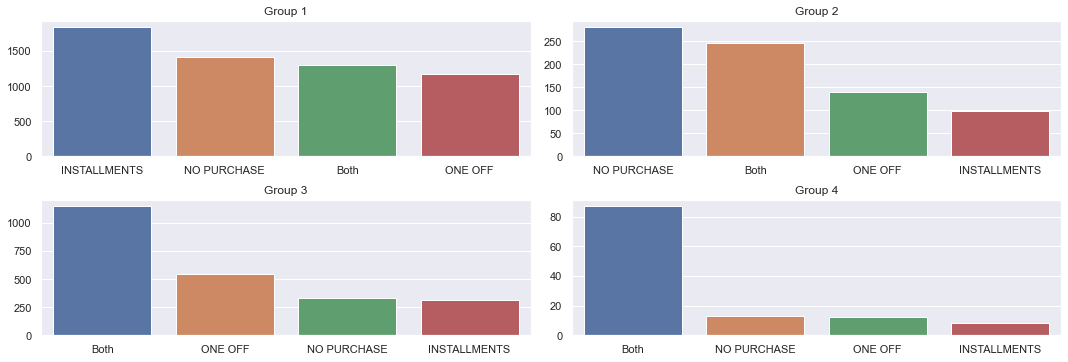

In [98]:
fig, ax = plt.subplots(2, 2)
# Setting height and width of subplots
fig.set_figheight(5)
fig.set_figwidth(15)

x1=data[data['clusters']==0]["PURCHASE_TYPE"].value_counts()
x2=data[data['clusters']==1]["PURCHASE_TYPE"].value_counts()
x3=data[data['clusters']==2]["PURCHASE_TYPE"].value_counts()
x4=data[data['clusters']==3]["PURCHASE_TYPE"].value_counts()


sns.barplot(list(x1.index),list(x1.values),ax=ax[0, 0])
sns.barplot(list(x2.index),list(x2.values),ax=ax[0, 1])
sns.barplot(list(x3.index),list(x3.values),ax=ax[1, 0])
sns.barplot(list(x4.index),list(x4.values),ax=ax[1, 1])

plt.tight_layout(h_pad=2.0)
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')

### Advance Cash

Text(0.5, 1.0, 'Group 4')

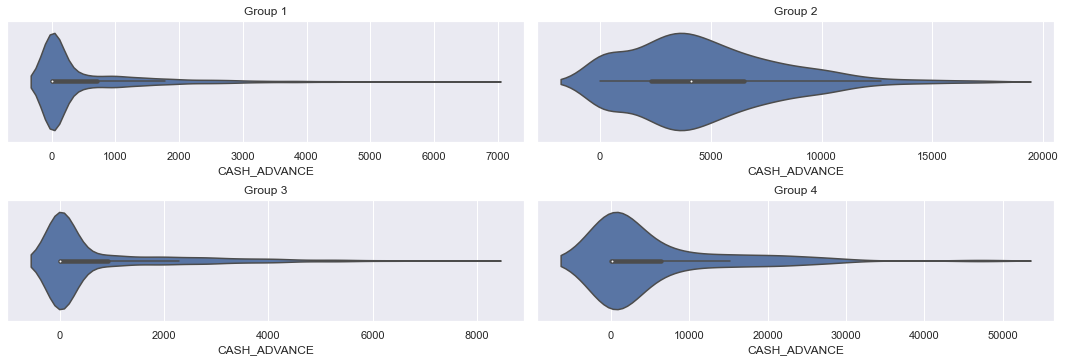

In [99]:
fig, ax = plt.subplots(2, 2)
# Setting height and width of subplots
fig.set_figheight(5)
fig.set_figwidth(15)
sns.violinplot(data[data['clusters']==0]["CASH_ADVANCE"], ax=ax[0, 0])
sns.violinplot(data[data['clusters']==1]["CASH_ADVANCE"], ax=ax[0, 1])
sns.violinplot(data[data['clusters']==2]["CASH_ADVANCE"], ax=ax[1, 0])
sns.violinplot(data[data['clusters']==3]["CASH_ADVANCE"], ax=ax[1, 1])
plt.tight_layout(h_pad=2.0)
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')

### Credit Limit 

Text(0.5, 1.0, 'Group 4')

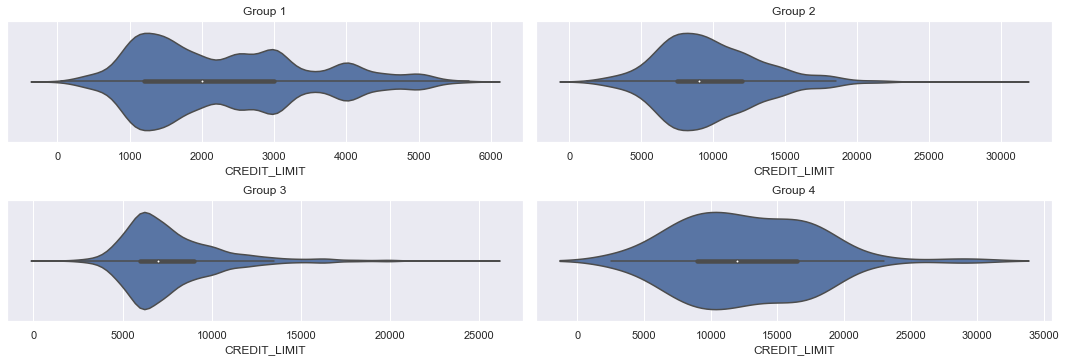

In [100]:
fig, ax = plt.subplots(2, 2)
# Setting height and width of subplots
fig.set_figheight(5)
fig.set_figwidth(15)
sns.violinplot(data[data['clusters']==0]["CREDIT_LIMIT"], ax=ax[0, 0])
sns.violinplot(data[data['clusters']==1]["CREDIT_LIMIT"], ax=ax[0, 1])
sns.violinplot(data[data['clusters']==2]["CREDIT_LIMIT"], ax=ax[1, 0])
sns.violinplot(data[data['clusters']==3]["CREDIT_LIMIT"], ax=ax[1, 1])
plt.tight_layout(h_pad=2.0)
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')

### Purchase Credit Ratio

Text(0.5, 1.0, 'Group 4')

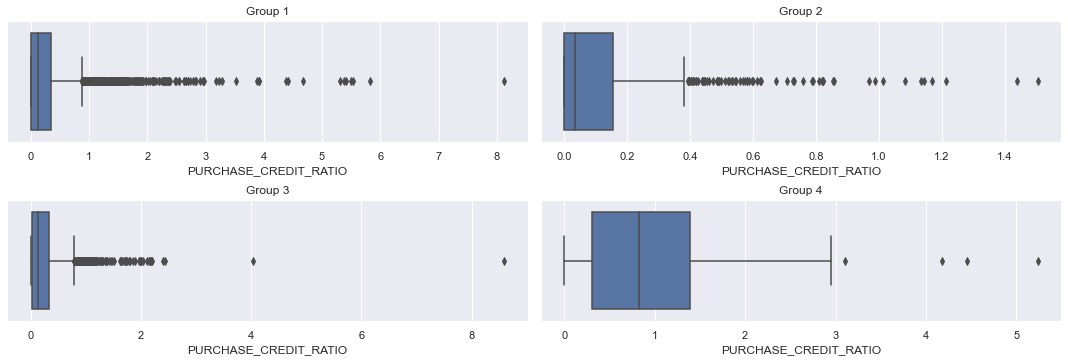

In [101]:
fig, ax = plt.subplots(2, 2)
# Setting height and width of subplots
fig.set_figheight(5)
fig.set_figwidth(15)
sns.boxplot(data[data['clusters']==0]["PURCHASE_CREDIT_RATIO"], ax=ax[0, 0])
sns.boxplot(data[data['clusters']==1]["PURCHASE_CREDIT_RATIO"], ax=ax[0, 1])
sns.boxplot(data[data['clusters']==2]["PURCHASE_CREDIT_RATIO"], ax=ax[1, 0])
sns.boxplot(data[data['clusters']==3]["PURCHASE_CREDIT_RATIO"], ax=ax[1, 1])
plt.tight_layout(h_pad=2.0)
ax[0,0].set_title('Group 1')
ax[0,1].set_title('Group 2')
ax[1,0].set_title('Group 3')
ax[1,1].set_title('Group 4')